#### DATA 620 - WEEK 3,PART 1
##### Author: Brian Weinfield, Alex Low, Jagruti Solao, Niteen Kumar
##### Date - 06/23/2018

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html
What can you infer about the relationships between (1) the women, and (2) the social events?  


In [221]:
# Loading libraries

import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import math
import csv
import pandas as pd

In [222]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [229]:
# Loading data
url = "https://raw.githubusercontent.com/solaojp/DATA-620/master/2NODE.csv"
s=requests.get(url).content
r=pd.read_csv(io.StringIO(s.decode('utf-8')))
r

,Row Labels,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
0,EVELYN,1,1,1,1,1,1,0,1,1,0,0,0,0,0
1,LAURA,1,1,1,0,1,1,1,1,0,0,0,0,0,0
2,THERESA,0,1,1,1,1,1,1,1,1,0,0,0,0,0
3,BRENDA,1,0,1,1,1,1,1,1,0,0,0,0,0,0
4,CHARLOTTE,0,0,1,1,1,0,1,0,0,0,0,0,0,0
5,FRANCES,0,0,1,0,1,1,0,1,0,0,0,0,0,0
6,ELEANOR,0,0,0,0,1,1,1,1,0,0,0,0,0,0
7,PEARL,0,0,0,0,0,1,0,1,1,0,0,0,0,0
8,RUTH,0,0,0,0,1,0,1,1,1,0,0,0,0,0
9,VERNE,0,0,0,0,0,0,1,1,1,0,0,1,0,0


In [239]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

In [224]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [240]:
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w), w))


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [241]:
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


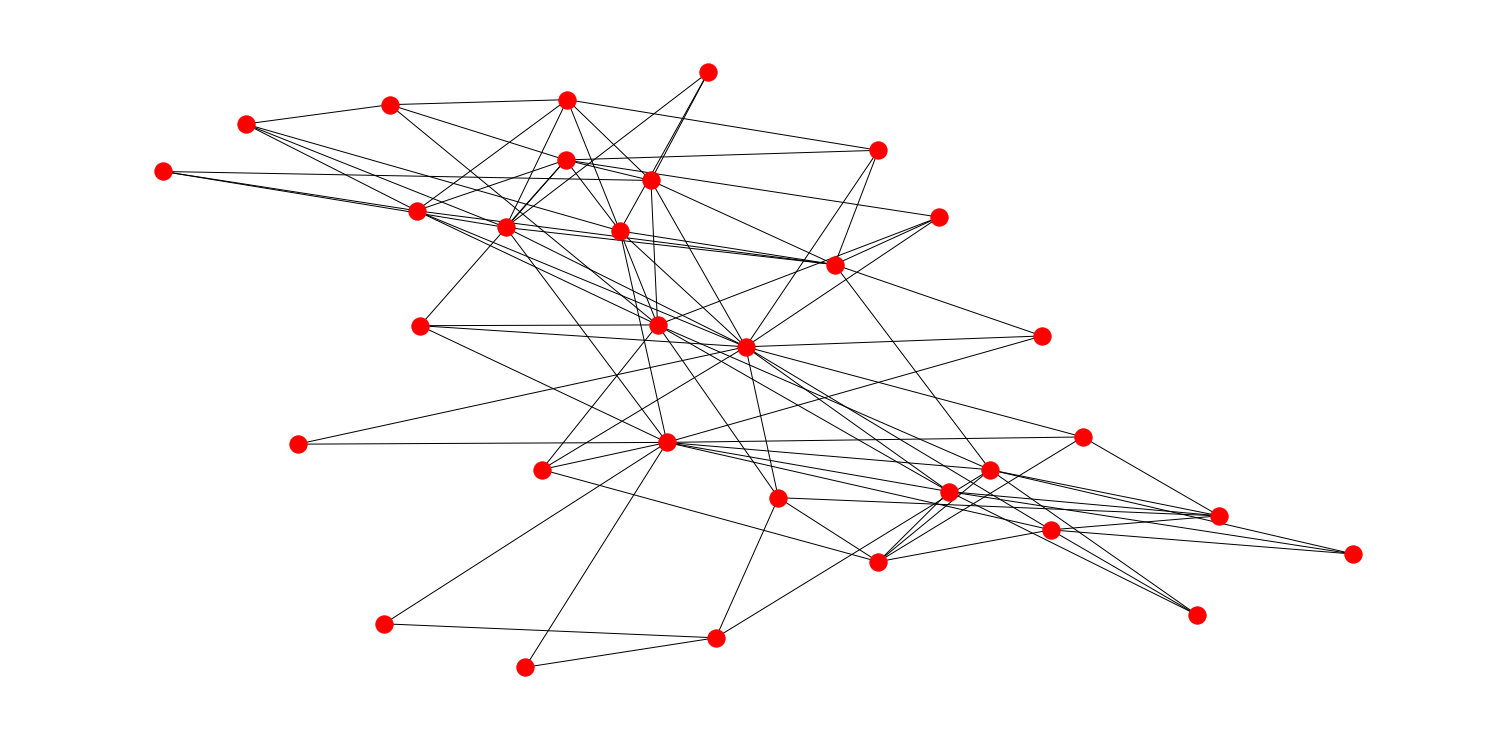

In [242]:
nx.draw(G)
plt.show()


In [ ]:
# Using reference from book


In [243]:
# Reading data
r=csv.reader(open('2NODE.csv'))
r

In [231]:
g = nx.Graph()

In [232]:
# We need to keep track seperately of nodes of all types
women = []
clubs = []

In [233]:
#Constructing a directed graph from edges in the csv file
for row in r:
    if row[0] not in women: 
        women.append(row[0])
    if row[12] not in clubs: 
        clubs.append(row[12])
g.add_edge(row[0],row[12], weight=int(row[10]))

In [234]:
# women Networks
##  I lost track from here
womennet=bipartite.weighted_projected_graph(g, women, ratio=False)

KeyError: '2'

In [235]:
#

weights=[math.log(edata['weight']) for f,t,edata in womennet.edges(data=True)]

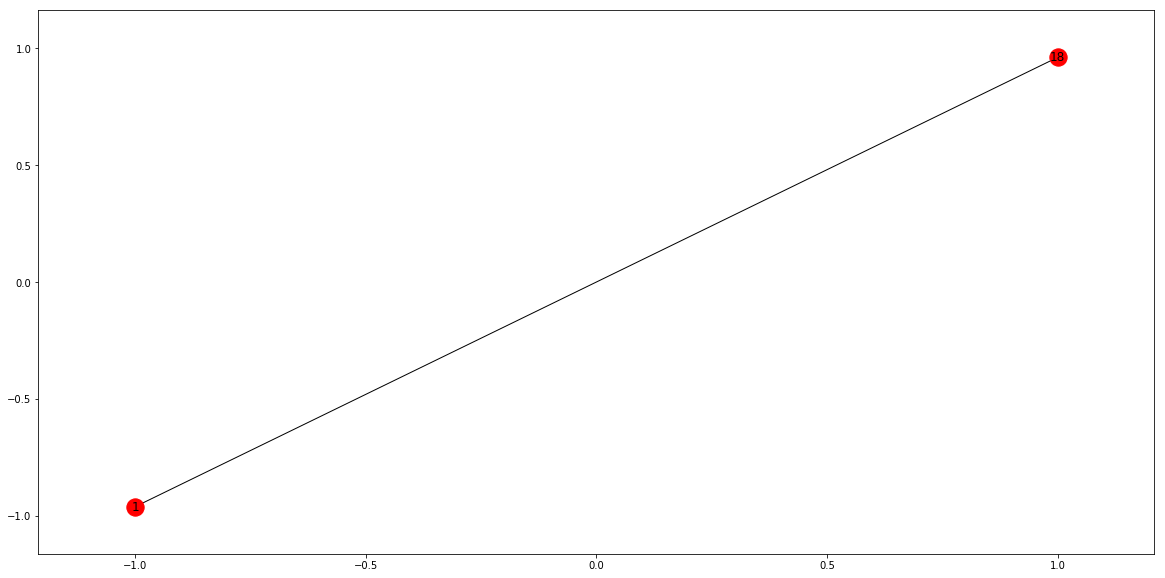

In [236]:
nx.draw_networkx(g,width = weights)
plt.show()

In [237]:
cannet=bipartite.weighted_projected_graph(g, clubs, ratio= FALSE)

KeyError: '0'

In [238]:
weights=[math.log(edata['weight']) for f,t,edata in cannet.edges(data=True)]

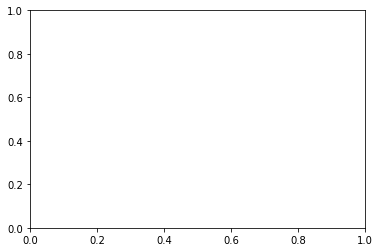

In [220]:
nx.draw_networkx(cannet,width=weights, edge_color=weights)
plt.show()